<a href="https://colab.research.google.com/github/ashinbasheer/ashinbasheer.github.io/blob/master/CA2__FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                        FIFA WORLD CUP 2018

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go


Importing dataset and preparation of data

Load dataset

In [6]:
# Importing the dataset 
dataset=pd.read_csv("https://raw.githubusercontent.com/ashinbasheer/ashinbasheer.github.io/master/CompleteDataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



Trying to get the head of the dataset

In [4]:
dataset.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset ‘CompleteDataset.csv’ contains information about 17981 players in total and 75 attributes associated with
those players.

This dataset was obtained from the kaggle page here where they have scraped the data from this https://sofifa.com/

Majority of the attributes are self-explanatory like the Flag, Age, nationality etc. The attributes like Acceleration, Ball Control,
Marking etc. just assigns a number between 1 and 100 for that particular player depending on the player’s strength in that area.But,
descriptions will be needed for the player positions as it will not be familiar for the people who don’t follow soccer. So, following 
are the descriptions of the player positions that I have used in the dataset.

Abbreviation	Meaning
CB	Center Back
LB	Left Back
RB	Right Back
CM	Center Midfield
LM	Left Midfield
RM	Right Midfield
ST	Striker
LW	Left Wing
RW	Right Wing




In [0]:
interesting_columns = [
    'Name', 
    'Age', 
    'Photo', 
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
dataset = pd.DataFrame(dataset, columns=interesting_columns)

Data preprocessing

Numeric columns of Value and Wage

Right away we can see that values in columns: 'Value' and 'Wage' aren't 
numeric but objects. Firstly we need to preprocess the data to make it usable for us. 
We will use short supporting function to convert values in those two columns into numbers. 
We will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.




In [0]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    

#dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

In [0]:
#We will also add two additional columns: 'ValueCategory' and 'WageCategory'.
#We will use those collumns to divide players into ten classes basing on their value and incom.

max_value = float(dataset['ValueNum'].max() + 1)
max_wage = float(dataset['WageNum'].max() + 1)

# Supporting function for creating category columns 'ValueCategory' and 'WageCategory'
def mappingAmount(x, max_amount):
    for i in range(0, 10):
        if x >= max_amount/10*i and x < max_amount/10*(i+1):
            return i
        
dataset['ValueCategory'] = dataset['ValueNum'].apply(lambda x: mappingAmount(x, max_value))
dataset['WageCategory'] = dataset['WageNum'].apply(lambda x: mappingAmount(x, max_wage))

In [0]:
#Potential points
dataset['PotentialPoints'] = dataset['Potential'] - dataset['Overall']
# Preferred position
dataset['Position'] = dataset['Preferred Positions'].str.split().str[0]
dataset['PositionNum'] = dataset['Preferred Positions'].apply(lambda x: len(x.split()))
## List of countries for each continent
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

# Function matching continent to countries
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

dataset['Continent'] = dataset['Nationality'].apply(lambda x: find_continent(x, continents))

In [0]:
from IPython.core.display import display, HTML, Javascript
from string import Template
import json
import IPython.display

In [0]:
top_1000 = dataset.sort_values("Overall", ascending=False).reset_index().head(1000)[["Name", "Nationality", "Continent", "Overall", "Club"]]

In [0]:
Africa = top_1000[top_1000["Continent"]=='Africa']
Antarctica = top_1000[top_1000["Continent"]=='Antarctica']
Asia = top_1000[top_1000["Continent"]=='Asia']
Australia_Oceania =  top_1000[top_1000["Continent"]=='Australia_Oceania']
Europe = top_1000[top_1000["Continent"]=='Europe']
North_america = top_1000[top_1000["Continent"]=='North_america']
South_america = top_1000[top_1000["Continent"]=='South_america']

data = {}
data["name"] = "DISTRIBUTION OF TOP 1000 PLAERS DUE TO NATIONALITY"
data["children"] = []
# Split dataset into Continents:~
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data["children"].append(continent_dict)


In [0]:
North_america_dict = {}
North_america_dict['name'] = 'North_america'
North_america_dict['children'] = []
for country in North_america['Nationality'].unique():
    list_of_countries = North_america[North_america['Nationality']==country][['Name', 'Overall']].rename(columns={'Name': 'name', 'Overall': 'size'})
    tmp_dict = {}
    tmp_dict["name"] = country
    tmp_dict["children"] = []
    for row in list_of_countries.values:
        player_tmp = {}
        player_tmp['name'] = row[0]
        player_tmp['size'] = row[1]
        tmp_dict["children"].append(player_tmp)
    North_america_dict['children'].append(tmp_dict)

In [0]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.node {
  cursor: pointer;
}

.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}

.node--leaf {
  fill: white;
}

.label {
  font: 11px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}

.label,
.node--root,
.node--leaf {
  pointer-events: none;
}

</style>
<svg width="800" height="1000"></svg>
"""

In [0]:
js_string="""
 require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
 });

  require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolatePlasma)
    .domain([-4, 4]);

var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);

d3.json("output.json", function(error, root) {
  if (error) throw error;

  root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

  var focus = root,
      nodes = pack(root).descendants(),
      view;

  var circle = g.selectAll("circle")
    .data(nodes)
    .enter().append("circle")
    .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
      .style("fill", function(d) { return d.children ? color(d.depth) : null; })
      .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
    .data(nodes)
    .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });

  var node = g.selectAll("circle,text");

  svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });

  zoomTo([root.x, root.y, root.r * 2 + margin]);

  function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

    transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }
  function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
  });
 """

In [0]:
with open('output.json', 'w') as outfile:  
    json.dump(data, outfile)

In [0]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { height: 95%; }
    div#menubar-container     { height: 65%; }
    div#maintoolbar-container { height: 99%; }
</style>
"""))

In [0]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)


Geographic distribution of players

Circle-packing is the arrangement of circles inside some demarcation so that none of the circles overlap. Circle packing also displays hierarchy where you can get smaller clusters of circles packed within a bigger circle which itself is arranged next to or within other circles. The D3.js plot will be interactive and dynamic, where one is able to invoke zoomable animations at different regions and clusters with the click of a mouse button. The D3.js plot will be interactive and dynamic, where one is able to invoke zoomable animations at different regions and clusters with the click of a mouse button. Each of the player’s nationality was mapped to its respective continent. There were 162 distinct Nationality values in the dataset and these countries were mapped to 6 continents: Asia, Europe, Africa, North America, South America and Australia/Oceania. In the plot, the 6 continents will be the parent class (outer circles). We can dive deeper within this class to find the countries (sub-class / sub-circles) and within each country, we will find the players (inner circles). The size of the player circle is determined by the Overall variable. A continent dictionary was created with the names of the continents as the keys and the list of countries as the values for each key. A function was defined to assign the continent for each country. The top 2000 players were chosen based on the overall value. Groupings of the players were hence identified using the Nationality and Continent. This grouping will be displayed with the circle graph plot and is fed into the json file. The data to be displayed is stored in the json file.

Grouping players by Age

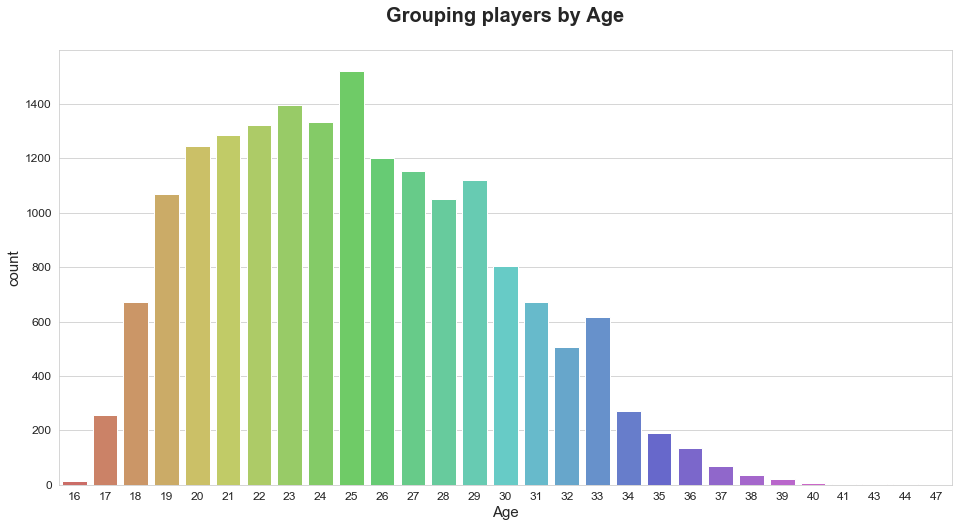

In [0]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Age", data=dataset, palette="hls");
plt.show()

Grouping players by Preffered Position

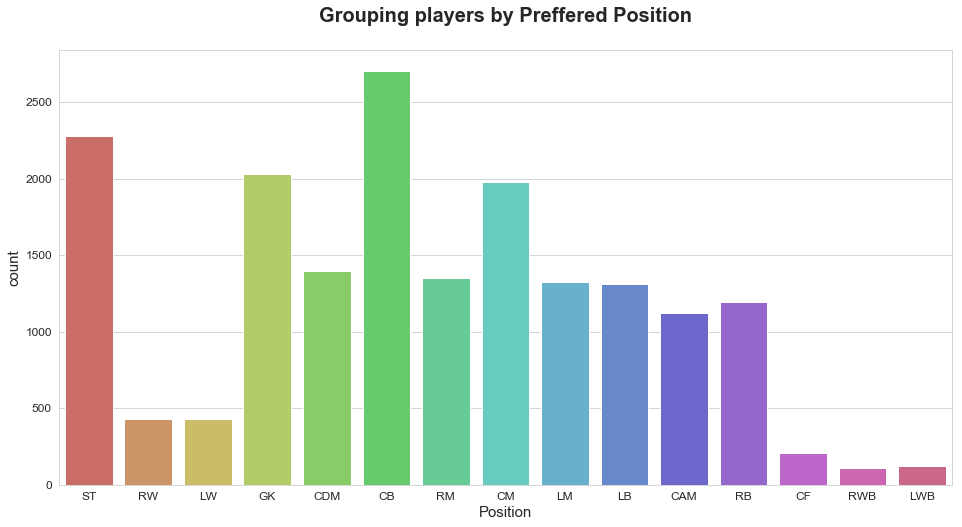

In [0]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preffered Position', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

The FacetGrid
The core seaborn utility for faceting is the FacetGrid. A FacetGrid is an object which stores some information on how you want to break up your data visualization.

For example, suppose that we're interested in (as in the previous notebook) comparing strikers and goalkeepers in some way. To do this, we can create a FacetGrid with our data, telling it that we want to break the Position variable down by col (column).

Since we're zeroing in on just two positions in particular, this results in a pair of grids ready for us to "do" something with

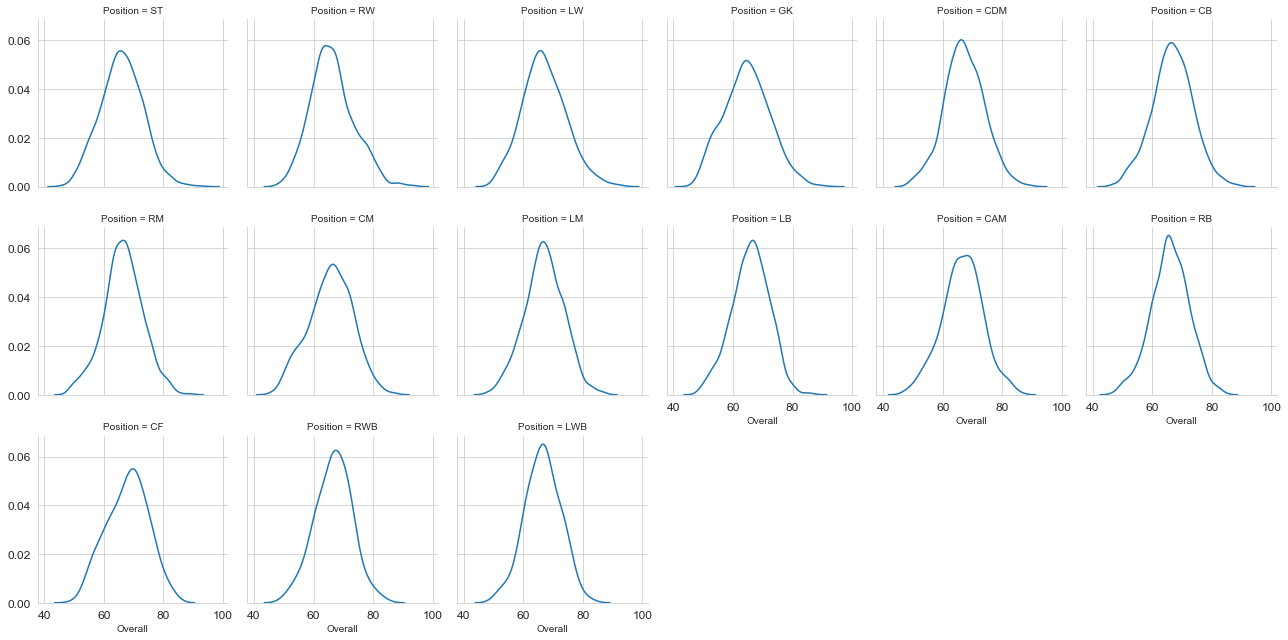

In [0]:
df = dataset

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")


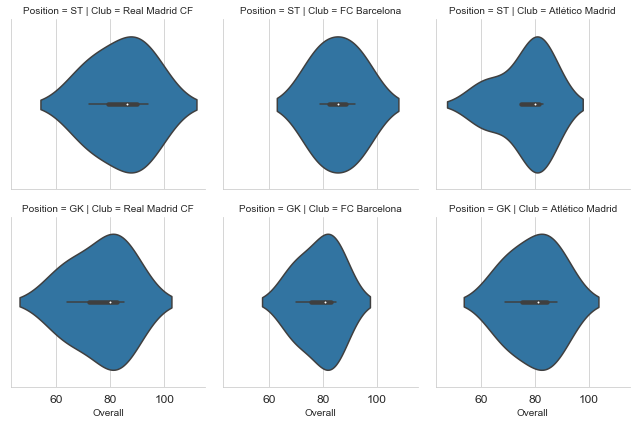

In [0]:
df = dataset[dataset['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall", order=[])

# Obs: 
# I didn't understand the "order" parameter here, but, a warning is displayed without it
# UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

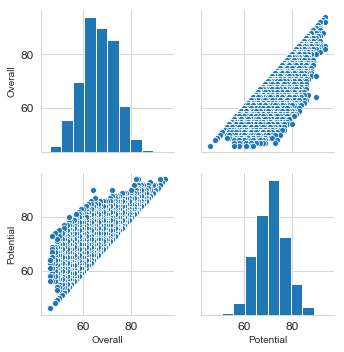

In [0]:
sns.pairplot(dataset[['Overall', 'Potential', 'Value']])

In [0]:
from plotly.offline import init_notebook_mode, iplot
#plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt     #matplotlib


Club Rates of the Top 100 Players with Pie Plot

In [0]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Club Rates of Top 100 Players

In [0]:
#Prepare Data Frame
d_frame = dataset.iloc[:100,:]
donut= d_frame.Club.value_counts()
labels = d_frame.Club.value_counts().index

#Creat figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Club rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

 Top 10 Players 'Ball Control', 'Dribbling' and 'Shot Power' Features Comparison with Scatter 3D Plot

In [0]:
#Now let's see the top 10 countries with the have more players
dataset.groupby("Nationality").Name.count().sort_values(ascending=False).head(10)

Nationality
England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Name, dtype: int64

# Map Distribution of the Players and How many players from the same Country?

In [0]:
#How many players are from the same country?
df = dataset['Nationality'].value_counts()

iplot([
    go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text= df.index,
    z=df.values,
    colorscale= 'Jet'
    )
])

Nationality Rates of the Top 100 Players with Pie Plot

# Donut Chart for Nationality rate of Top 100 players accoding to thir Club rate

In [0]:
#Prepare Data Frame
d_frame = dataset.iloc[:100,:]
donut= d_frame.Nationality.value_counts()
labels = d_frame.Nationality.value_counts().index #Country names of the top 100 players

#Creat Figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Clubs Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Nationality rates of the top 100 players",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)


Text(0.5, 1.0, 'Average Rating by Age')

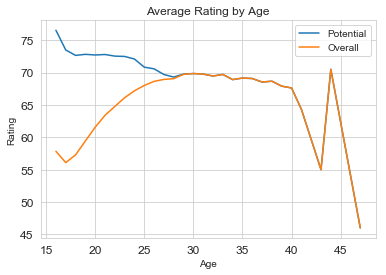

In [0]:
df_p = dataset.groupby(['Age'])['Potential'].mean()
df_o = dataset.groupby(['Age'])['Overall'].mean()

df_summary = pd.concat([df_p, df_o], axis=1)

ax = df_summary.plot()
ax.set_ylabel('Rating')
ax.set_title('Average Rating by Age')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import missingno as msno
import plotly.plotly as py

%matplotlib inline
rcParams["figure.figsize"] = 12, 8
rcParams["font.size"] = 3
rcParams["xtick.labelsize"] = 12
rcParams["ytick.labelsize"] = 12


# Distribution of the Overall Variable 

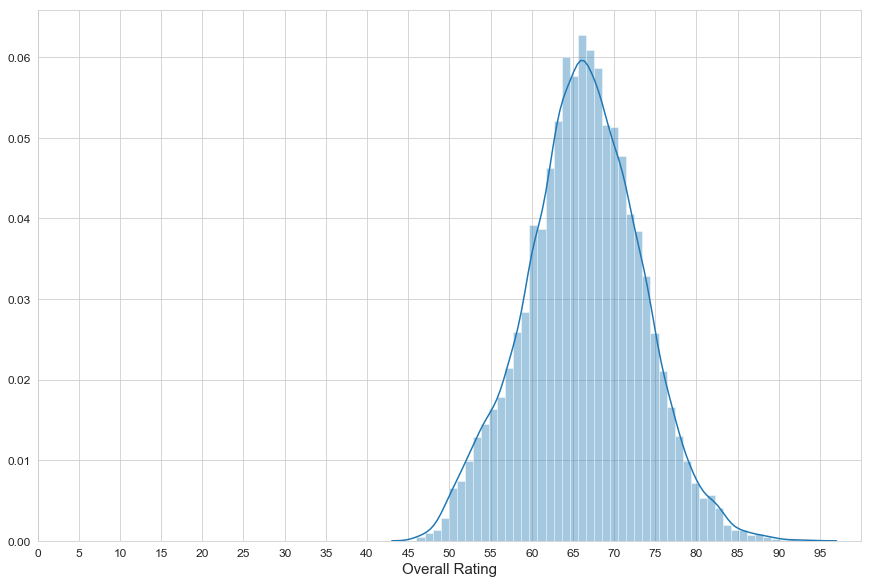

In [0]:
# Overall ratings
fig, axe = plt.subplots()
ax = sns.distplot(dataset["Overall"], bins=len(dataset["Overall"].value_counts().index))
ax.set_xticks(range(0, 100, 5))
ax.set_xlim(0,100)
ax.set_xlabel("Overall Rating",fontsize=15)
fig.tight_layout()

In [0]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

#Create a data frame from Messi and Ronaldo's 6 Ultimate Team data points from FIFA 18
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])

In [0]:
data

,Defending,Dribbling,Pace,Passing,Physical,Shooting
Messi,26,95,89,86,61,90
Ronaldo,33,90,90,82,80,93


In [0]:
Attributes =list(data)
AttNo = len(Attributes)

In [0]:
values = data.iloc[1].tolist()
values += values [:1]
values

[33, 90, 90, 82, 80, 93, 33]

In [0]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

# Radar Chart for Ronaldo and their Attributes

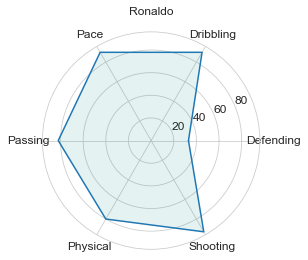

In [0]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Ronaldo")
plt.show()

# Radar Chart For Comparison of Messi Vs. Ronaldo

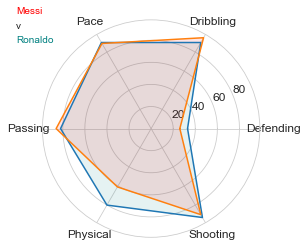

In [0]:
#Find the values and angles for Messi - from the table at the top of the page
values2 = data.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]


#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9,"Messi",color="red")
plt.figtext(0.2,0.85,"v")
plt.figtext(0.2,0.8,"Ronaldo",color="teal")
plt.show()

In [0]:
def createRadar2(player, data, player2, data2):
    Attributes = ["Defending","Dribbling","Pace","Passing","Physical","Shooting"]
    
    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    angles2 = [n / 6 * 2 * pi for n in range(6)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player,color="teal")
    plt.figtext(0.2,0.85,"v")
    plt.figtext(0.2,0.8,player2,color="red")
    plt.show()

# Radar Chart for Comparison of Henderson and Wilshare

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



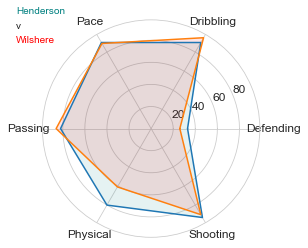

In [0]:
createRadar2("Henderson", [76,76,62,82,81,70],"Wilshere", [62,82,71,80,72,69])

Radar charts are an interesting way to display data and allow us to compare two observations quite nicely. In this, we have used them to compare fictional FIFA players, but analysts have used this format very innovatively to display actual performance data in an engaging format.

# Grouping players By Overall

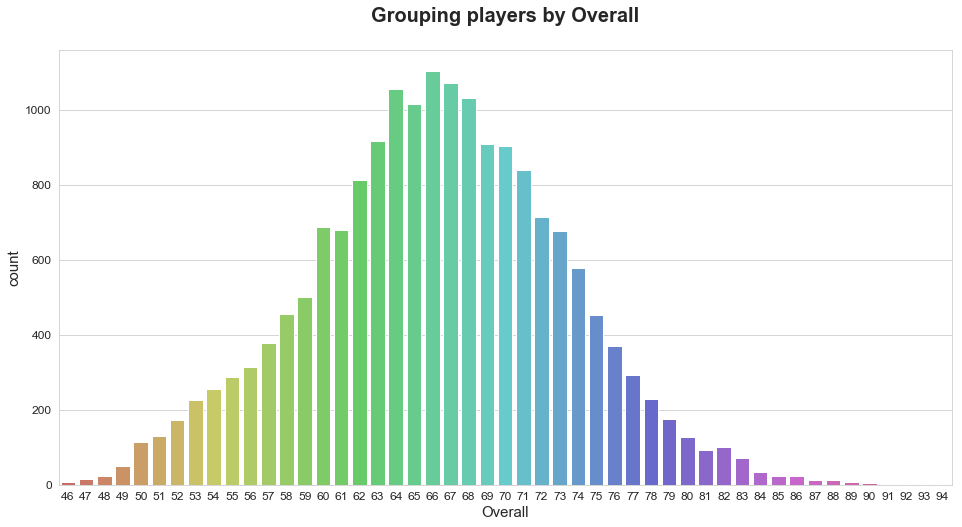

In [0]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=15)
plt.ylabel('Players Age', fontsize=15)
sns.countplot(x="Overall", data=dataset, palette="hls");
plt.show()


In [0]:
from wordcloud import WordCloud

# Names of the Top 100 Players with 'Word Cloud

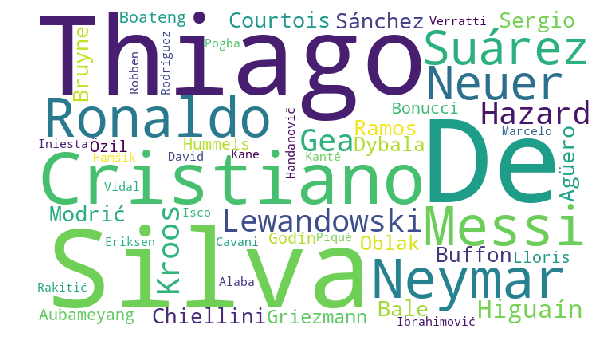

In [0]:

#Prepare Data Frame
d_frame = dataset.Name[:50]

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                   background_color='White',
                        width = 700,
                        height = 400
    ).generate(" ".join(d_frame))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

In [0]:
fifa_data=dataset

In [0]:
# In order to be able to start our ranking from 1, we have assigned the 'array' variable.
fifa_data['array'] = fifa_data['Unnamed: 0']+1

In [0]:
# Let's change the names of some columns
fifa_data.rename(columns={'Ball control':'ball_control','Free kick accuracy':'free_kick',
                     'Shot power':'shot_power'}, inplace=True)
# Just take the columns we'll use
fifa_data= fifa_data[['array','Name','Age','Nationality','Overall','Potential','Club','Value',
                      'Wage','Special','Acceleration','ball_control','Dribbling','free_kick',
                      'Penalties','shot_power']]

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go
from plotly import tools
from wordcloud import WordCloud     #word cloud library
import matplotlib.pyplot as plt     #matplotlib

# Comparing the 'Overall' and 'Potential' of Players with Scatter Plot

In [0]:
# Prepare Data Frame
d_frame = fifa_data.iloc[:100,:]

#Creating trace1
trace1 = go.Scatter(
    x= d_frame.array,
    y= d_frame.Overall,
    mode='lines',
    name='Overall',
    marker= dict(color='rgba(12, 255, 250,0.9)'),
    text= d_frame.Name
)
#Creating trace2
trace2 = go.Scatter(
    x= d_frame.array,
    y= d_frame.Potential,
    mode='lines+markers',
    name='Potential',
    
    text= d_frame.Name
)
data = [trace1,trace2]
layout= dict(title="Comparing the 'Overall' and 'Potential' of players",
            xaxis= dict(title='Player Rank', ticklen=5, zeroline=False)
            )
fig= dict(data=data, layout=layout)
iplot(fig)

We are visualizing the trends of the Overall and potenial on the basis of the player's rank. So, the players are having high potenial as comapre to their overall value.

# Comparing 'Overall' and 'Potential' Values of Players between 90 and 100 with Bar Plot

In [0]:
# Prepare Data Frame
d_frame = fifa_data.iloc[90:100,:]

#create trace1
trace1 = go.Bar(
    x= d_frame.array,
    y= d_frame.Overall,
    name= 'Overall',
    marker= dict(color= 'rgba(255,106,0,0.9)',
                line= dict(color= 'rgb(0,0,0)', width=1)),
    text= d_frame.Name
)
#Create trace2
trace2 = go.Bar(
    x= d_frame.array,
    y= d_frame.Potential,
    name= 'Potential',
    marker= dict(color= 'rgba(148, 255, 130,0.9)',
                line= dict(color='rgb(0,0,0)', width=1)),
)
data= [trace1, trace2]
layout= go.Layout(barmode= "group")
fig= go.Figure(data=data, layout=layout)
iplot(fig)

From above barplot, we are trying to do some analysis on the players from 90 to 100 in respect of overall and their potential values.Player no.91 and 92 have equal overal and potential but from player 93 to 100 everbody have the higher potenial value as compare to the overall value.

# Top 5 Players Frikik and Penalty Strokes Comparison with Bar Plot

In [0]:
#Prepare Data Frame
d_frame = fifa_data.iloc[:5,:]

#Create trace1
trace1= {
    'x': d_frame.array,
    'y': d_frame.free_kick,
    'name': 'Free Kick',
    'type': 'bar',
    'text': d_frame.Name
};
#Create trace2
trace2= {
    'x': d_frame.array,
    'y': d_frame.Penalties,
    'name': 'Penalty',
    'type': 'bar',
    'text': d_frame.Name,
    'marker': dict(color= 'rgba(148, 255, 130,0.9)'),
};
data= [trace1, trace2]
layout= {
    'xaxis': {'title':'First 5 Player'},
    'barmode': 'relative',
    'title': 'Top 5 Players frikik and penalty strokes comparison'
};
fig = go.Figure(data=data, layout=layout)
iplot(fig)

From above barplot, Neymar and Suarez are aproximately same free kick and penalty but messi has high free kick but less penalty.Ronaldo has 85 penalty and 75 free kick.

# Top 10 Players 'Ball Control', 'Dribbling' and 'Shot Power' Features Comparison with Scatter 3D Plot

In [0]:
#Prepare Data Frame
d_frame = fifa_data.iloc[:10,:]

#Create trace
trace = go.Scatter3d(
    x=d_frame.ball_control,
    y=d_frame.Dribbling,
    z=d_frame.shot_power,
    text= d_frame.Name,
    mode='markers',
    marker=dict(
        size=12,
        #color= z,          #set color to an array/list of desired value (plotly.ly)
 
        colorscale='Viridis',   #Choose a colorscale
        opacity=0.8
    )
)
data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In above visualization, we are trying to visualize the top ten players performance features (Ball Control,dribling and shot power ).If we hover over the graph, we can visualize that messi,ronaldo,Hazard and neymar ball control and dribbling are aproximately same but in the case of shot power ronaldo is much better.Furthermore,Neuer and Gea are having worst ball control,dribling and shot power performance features.